# Week 13 Descriptive Statistics & Initial Data Exploration

This notebook provides the descriptive statistics and exploratory analysis for my Mental Health dataset. The goal of this checkpoint is to understand the structure of the dataset, identify key variables, examine basic patterns, and prepare for hypothesis testing in Week 14.

This exploration includes:
- Previewing the dataset
- Checking variable types
- Summarizing numerical and categorical variables
- Identifying missing values
- Creating basic visualizations

This helps guide the final permutation test and bootstrap uncertainty analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/Mental-Health.csv", on_bad_lines="skip")
df.columns = df.columns.str.strip()
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,
0,'2014-08-27 11:29:31',37,Female,'United States',IL,?,No,Yes,Often,6-25,...,No,No,'Some of them',Yes,No,Maybe,Yes,No,? ...,
1,'2014-08-27 11:29:37',44,M,'United States',IN,?,No,No,Rarely,'More than 1000',...,Maybe,No,No,No,No,No,'Don\'t know',No,? ...,
2,'2014-08-27 11:29:44',32,Male,Canada,?,?,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,? ...,
3,'2014-08-27 11:29:46',31,Male,'United Kingdom',?,?,Yes,Yes,Often,26-100,...,Yes,Yes,'Some of them',No,Maybe,Maybe,No,Yes,? ...,
4,'2014-08-27 11:30:22',31,Male,'United States',TX,?,No,No,Never,100-500,...,No,No,'Some of them',Yes,Yes,Yes,'Don\'t know',No,? ...,


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1257 non-null   object
 1   Age                        1257 non-null   int64 
 2   Gender                     1257 non-null   object
 3   Country                    1257 non-null   object
 4   state                      1257 non-null   object
 5   self_employed              1257 non-null   object
 6   family_history             1257 non-null   object
 7   treatment                  1257 non-null   object
 8   work_interfere             1257 non-null   object
 9   no_employees               1257 non-null   object
 10  remote_work                1257 non-null   object
 11  tech_company               1257 non-null   object
 12  benefits                   1257 non-null   object
 13  care_options               1257 non-null   object
 14  wellness

## Dataset Structure

The `info()` output shows:
- Number of rows
- Number of columns (28 total)
- Which columns are numeric vs. categorical
- Where missing values occur

This helps identify which variables need cleaning and which are ready for analysis.


In [3]:
df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,
count,1257,1.257000e+03,1257,1257,1257,1257,1257,1257,1257,1257,...,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257
unique,1244,NaN,47,47,46,3,2,2,5,6,...,3,3,3,3,3,3,3,2,159,1
top,'2014-08-27 12:43:28',NaN,Male,'United States',?,No,No,Yes,Sometimes,6-25,...,No,No,'Some of them',Yes,No,Maybe,'Don\'t know',No,? ...,
freq,2,NaN,615,751,514,1094,766,635,464,289,...,490,925,774,515,1007,556,575,1074,1095,1257
mean,NaN,7.955453e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.820541e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Summary Statistics for Numerical Variables

The dataset has a few key numeric variables, such as age. The summary gives the mean, median, minimum, maximum ranges. This provides a quick overview of the typical respondent profile and helps identify potential outliers or skew.


In [4]:
df.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
                             0
dtype: int64

In [5]:
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("\n")

Column: Timestamp
Timestamp
'2014-08-27 12:43:28'    2
'2014-08-27 15:55:07'    2
'2014-08-27 12:54:11'    2
'2014-08-27 12:44:51'    2
'2014-08-27 12:37:50'    2
                        ..
'2015-04-02 15:47:43'    1
'2015-04-04 11:22:05'    1
'2015-04-06 14:58:29'    1
'2015-04-11 14:35:22'    1
'2015-04-23 14:03:51'    1
Name: count, Length: 1244, dtype: int64


Column: Gender
Gender
Male                          615
male                          206
Female                        121
M                             116
female                         62
F                              38
m                              34
f                              15
Make                            4
'Male '                         3
Woman                           3
'Female '                       2
Man                             2
'Cis Male'                      2
'Female (trans)'                2
'something kinda male?'         1
maile                           1
Trans-female                    1

## Data Cleaning Notes

This cell prepares the raw survey data for analysis by reducing noise, removing invalid entries, and standardizing inconsistent text fields.

 1) Drop non-essential columns

 2) Clean and constrain `Age`

 3) Standardize `Gender` values

 4) Subset to tech workers

In [6]:
# Dropping unnecessary columns to simplify analysis and reduce noise
df = df.drop(columns=['Timestamp', 'comments', 'state', 'Country'], errors='ignore')

# 2. Fix Age
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# 3. Standardize Gender
def clean_gender(gender):
    g = str(gender).lower().strip()
    if g in ['male', 'm', 'man', 'cis male', 'make', 'male-ish', 'mal', 'male (cis)', 'cis man', 'msle', 'mail', 'malr', 'maile']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'cis female', 'femake', 'female ', 'cis-female/femme', 'female (cis)', 'femail']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

# Check the results
print(df['Gender'].value_counts())

# # Filter for Tech Workers only
# if 'tech_company' in df.columns:
#     df = df[df['tech_company'] == 'Yes']

Gender
Male      978
Female    243
Other      29
Name: count, dtype: int64


## Categorical Variable Distributions

These counts show how responses are distributed across categories such as gender, treatment history, work interference, mental health consequences, and more. This helps identify patterns and which variables may be useful for the hypothesis test.


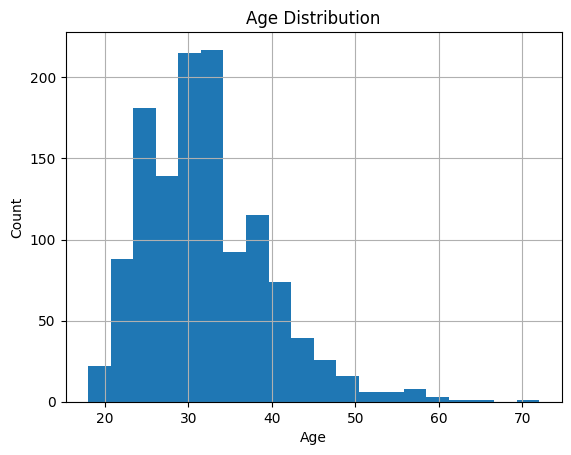

In [7]:
df["Age"].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The age distribution shows that most survey participants fall between their 20s and 40s. This helps understand the population represented in the dataset.


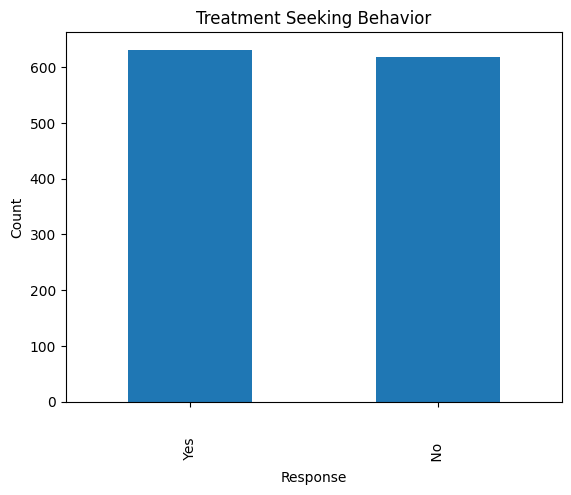

In [8]:
df["treatment"].value_counts().plot(kind="bar")
plt.title("Treatment Seeking Behavior")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

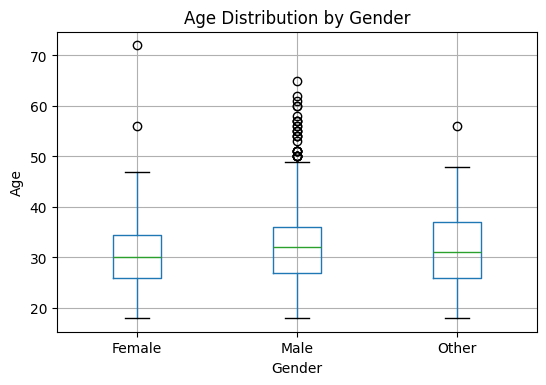

In [9]:
df.boxplot(column="Age", by="Gender", figsize=(6,4))
plt.title("Age Distribution by Gender")
plt.suptitle("") 
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


The boxplot compares age distribution across gender categories. This is helpful for detecting demographic differences in the dataset that might relate to mental health experiences.


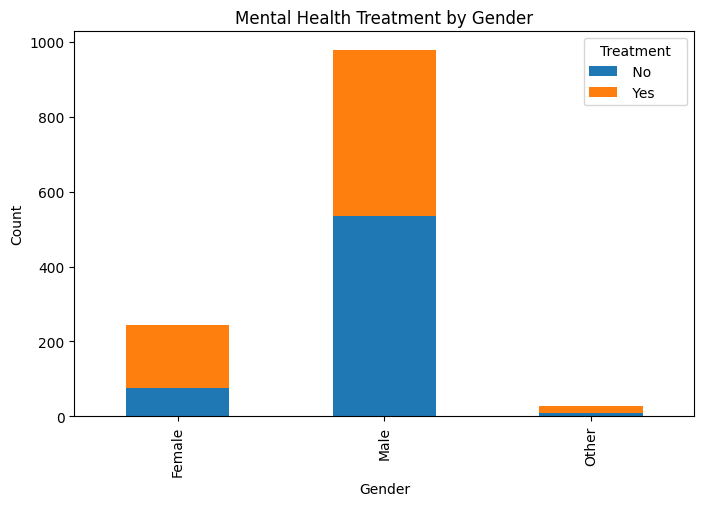

In [10]:
gender_treatment = df.groupby(['Gender', 'treatment']).size().unstack()
gender_treatment.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Mental Health Treatment by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.show()

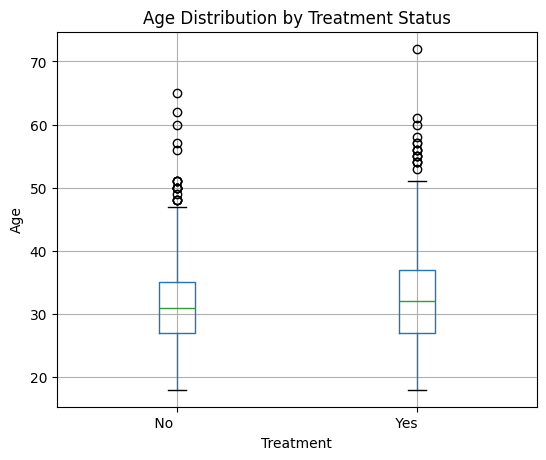

In [11]:
# Boxplot of Age grouped by treatment status
df.boxplot(column='Age', by='treatment', figsize=(6, 5))
plt.title("Age Distribution by Treatment Status")
plt.suptitle("")
plt.xlabel("Treatment")
plt.ylabel("Age")
plt.show()

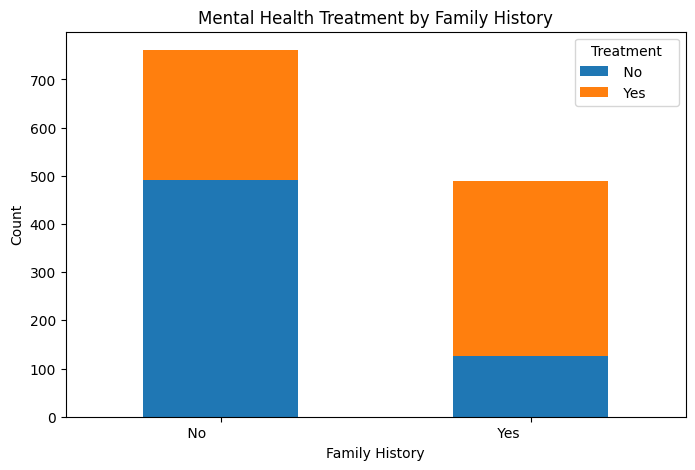

In [12]:
fh_treatment = df.groupby(['family_history', 'treatment']).size().unstack()
fh_treatment.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Mental Health Treatment by Family History")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.show()

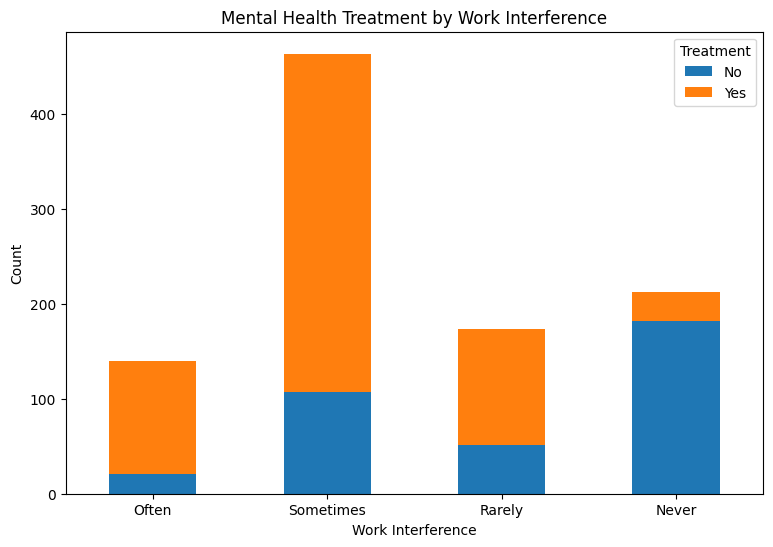

In [13]:
df['work_interfere'] = df['work_interfere'].str.strip()
df['treatment'] = df['treatment'].str.strip()

order = ['Often', 'Sometimes', 'Rarely', 'Never']
wi_treatment = df.groupby(['work_interfere', 'treatment']).size().unstack().reindex(order)
wi_treatment.plot(kind='bar', stacked=True, figsize=(9, 6))
plt.title("Mental Health Treatment by Work Interference")
plt.xlabel("Work Interference")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.xticks(rotation=0)
plt.show()

# Summary of Initial Exploration

In this Week 13 checkpoint, I explored the Mental Health dataset through descriptive statistics and visualizations. I identified key variables observed the distribution of demographic and mental health responses and examined missing values.

In [18]:
print("\n1. DATASET OVERVIEW")
print(f"   - Total records after cleaning: {len(df)}")
print(f"   - Total variables: {len(df.columns)}")
print(f"   - Age range: {df['Age'].min()} to {df['Age'].max()} years")
print(f"   - Mean age: {df['Age'].mean():.1f} years")

print("\n2. GENDER DISTRIBUTION")
print(df['Gender'].value_counts())

print("\n3. TREATMENT-SEEKING BEHAVIOR")
treatment_counts = df['treatment'].value_counts()
treatment_pct = df['treatment'].value_counts(normalize=True) * 100
print(f"   - Seeking treatment (Yes): {treatment_counts.get('Yes', 0)} ({treatment_pct.get('Yes', 0):.1f}%)")
print(f"   - Not seeking treatment (No): {treatment_counts.get('No', 0)} ({treatment_pct.get('No', 0):.1f}%)")

print("\n4. MISSING VALUES")
missing_counts = df.isna().sum()
missing_summary = missing_counts[missing_counts > 0]
if len(missing_summary) > 0:
    print(f"   Columns with missing values:")
    for col, count in missing_summary.items():
        print(f"   - {col}: {count} ({count/len(df)*100:.1f}%)")
else:
    print("   No missing values in key analysis columns")


1. DATASET OVERVIEW
   - Total records after cleaning: 1250
   - Total variables: 24
   - Age range: 18 to 72 years
   - Mean age: 32.1 years

2. GENDER DISTRIBUTION
Gender
Male      978
Female    243
Other      29
Name: count, dtype: int64

3. TREATMENT-SEEKING BEHAVIOR
   - Seeking treatment (Yes): 631 (50.5%)
   - Not seeking treatment (No): 619 (49.5%)

4. MISSING VALUES
   No missing values in key analysis columns


Key takeaways:
- Most respondents are in their 20s-40s
- Males constitute the majority of respondents
- Treatment-seeking varies by gender and workplace factors
- Family history appears related to treatment status
- Work interference shows patterns with treatment behavior
- Treatment status family history and work interference show strong categorical patterns.

This initial exploration will guide the Week 14 analysis where I will:
- Finalize the hypothesis
- Conduct a permutation test
- Build bootstrap confidence intervals for a non-CLT statistic
- Interpret results and uncertainty

This descriptive analysis provides a solid foundation for hypothesis testing.